# Cardio Vascular Dataset Analysis

## Necessary imports

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

## Load dataset

In [23]:
dataset_path = "..\\Dataset\\Balanced_Dataset_Modif.csv"
# Load the dataset
df = pd.read_csv(dataset_path)

## Exploratory Data Analysis

In [24]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
display(df.head())

First few rows of the dataset:


,"sex (F=0,M=1)",age,Family history of heart disease,History of heart disease,echotype-mass,echotype-myxoma,echotype-thrombose,echotype-fibroma,echotype-vegetation,echotype-papillary fibroelastoma,...,pathotype-thrombose,pathotype-fibroma,pathotype-sarcoma,pathotype-carci0ma,pathotype-lypoma,pathotype-vegetation,pathotype-endocarditis,pathotype-NBTE,pathotype-papillary fibroelastoma,pathomalignancy
0,1,73,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,64,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,70,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,90,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,79,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Basic Information
Display basic information about the dataframe and its columns

In [25]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   sex (F=0,M=1)                      399 non-null    int64
 1   age                                399 non-null    int64
 2   Family history of heart disease    399 non-null    int64
 3   History of heart disease           399 non-null    int64
 4   echotype-mass                      399 non-null    int64
 5   echotype-myxoma                    399 non-null    int64
 6   echotype-thrombose                 399 non-null    int64
 7   echotype-fibroma                   399 non-null    int64
 8   echotype-vegetation                399 non-null    int64
 9   echotype-papillary fibroelastoma   399 non-null    int64
 10  echomasstype                       399 non-null    int64
 11  echoposition                       399 non-null    int64
 12  echomalignancy        

None

### Dataframe Statistics

In [26]:
print("\nSummary Statistics:")
display(df.describe())


Summary Statistics:


,"sex (F=0,M=1)",age,Family history of heart disease,History of heart disease,echotype-mass,echotype-myxoma,echotype-thrombose,echotype-fibroma,echotype-vegetation,echotype-papillary fibroelastoma,...,pathotype-thrombose,pathotype-fibroma,pathotype-sarcoma,pathotype-carci0ma,pathotype-lypoma,pathotype-vegetation,pathotype-endocarditis,pathotype-NBTE,pathotype-papillary fibroelastoma,pathomalignancy
count,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,...,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000
mean,0.448622,50.854637,0.170426,0.355890,0.546366,0.195489,0.125313,0.030075,0.022556,0.080201,...,0.095238,0.067669,0.185464,0.095238,0.017544,0.037594,0.025063,0.012531,0.075188,0.373434
std,0.497978,23.437052,0.376479,0.479383,0.498471,0.397074,0.331489,0.171009,0.148671,0.271944,...,0.293912,0.251493,0.389161,0.293912,0.131451,0.190451,0.156512,0.111379,0.264025,0.484323
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,51.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,70.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,91.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Missing Values

In [27]:
# Check for missing values
print("\nMissing Values:")
display(df.isnull().sum())


Missing Values:


sex (F=0,M=1)                        0
age                                  0
Family history of heart disease      0
History of heart disease             0
echotype-mass                        0
echotype-myxoma                      0
echotype-thrombose                   0
echotype-fibroma                     0
echotype-vegetation                  0
echotype-papillary fibroelastoma     0
echomasstype                         0
echoposition                         0
echomalignancy                       0
echosize                             0
echonumbers                          0
echoconsistency                      0
surgeryposition                      0
surgerysize                          0
surgerynumbers                       0
pathotype-myxoma                     0
pathotype-thrombose                  0
pathotype-fibroma                    0
pathotype-sarcoma                    0
pathotype-carci0ma                   0
pathotype-lypoma                     0
pathotype-vegetation     

There are no missing values in this dataset.

### Univariate Analysis


Univariate Analysis:


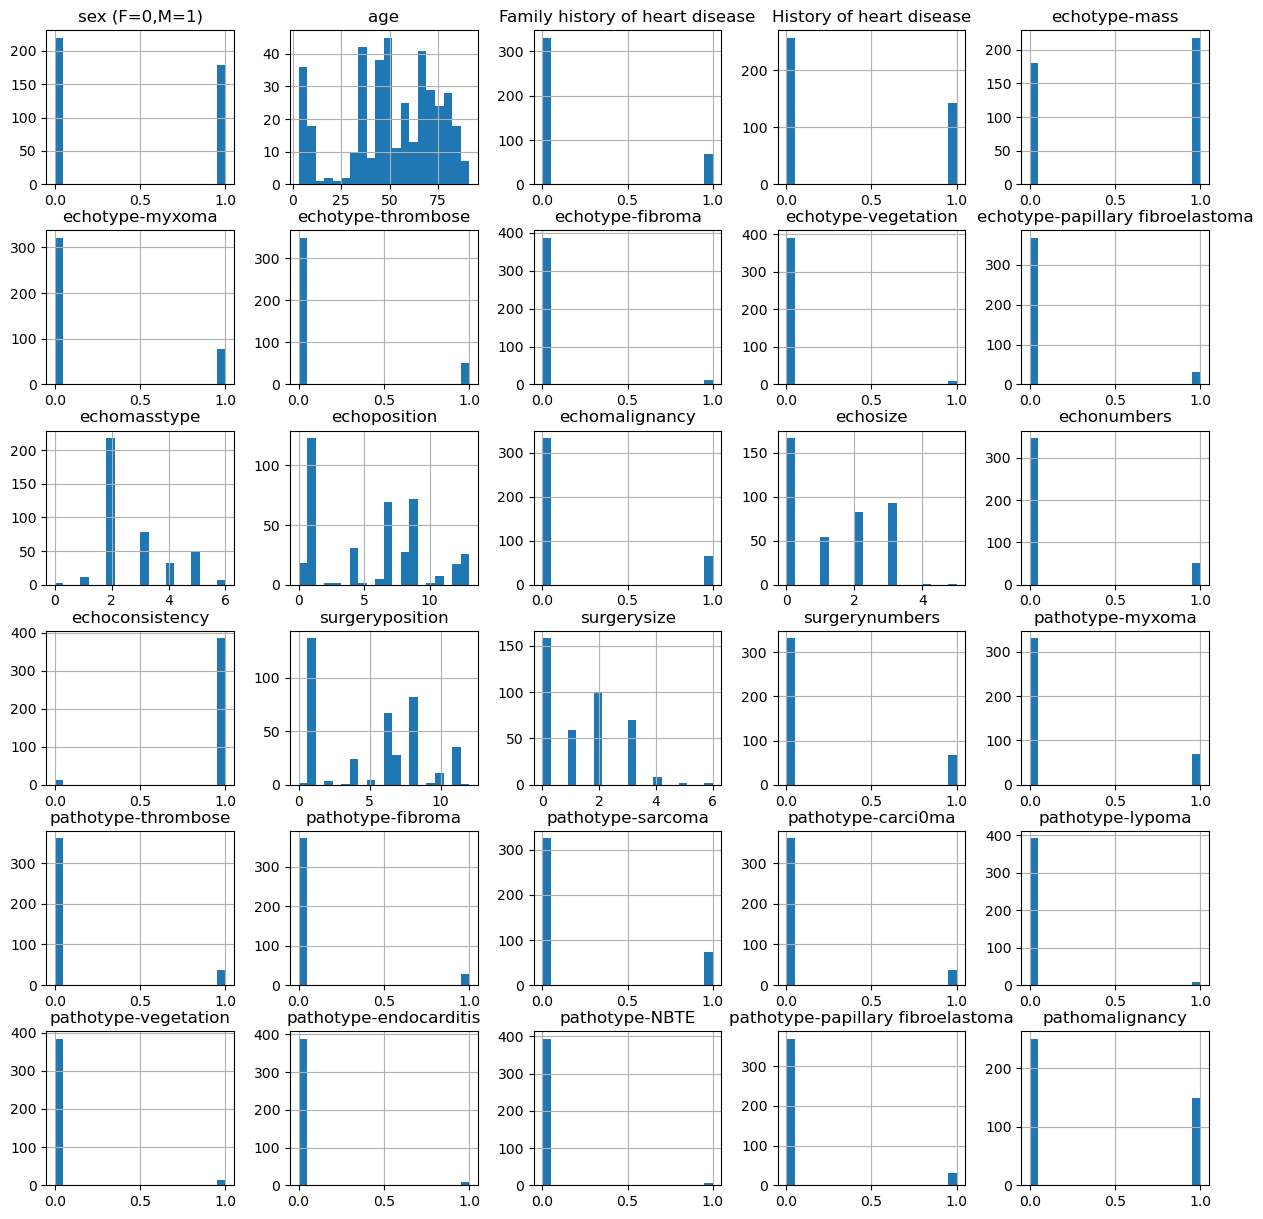

In [28]:
print("\nUnivariate Analysis:")
# Distribution of numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_features].hist(figsize=(15, 15), bins=20)
plt.show()

### Correlation Matrix


Correlation Matrix:


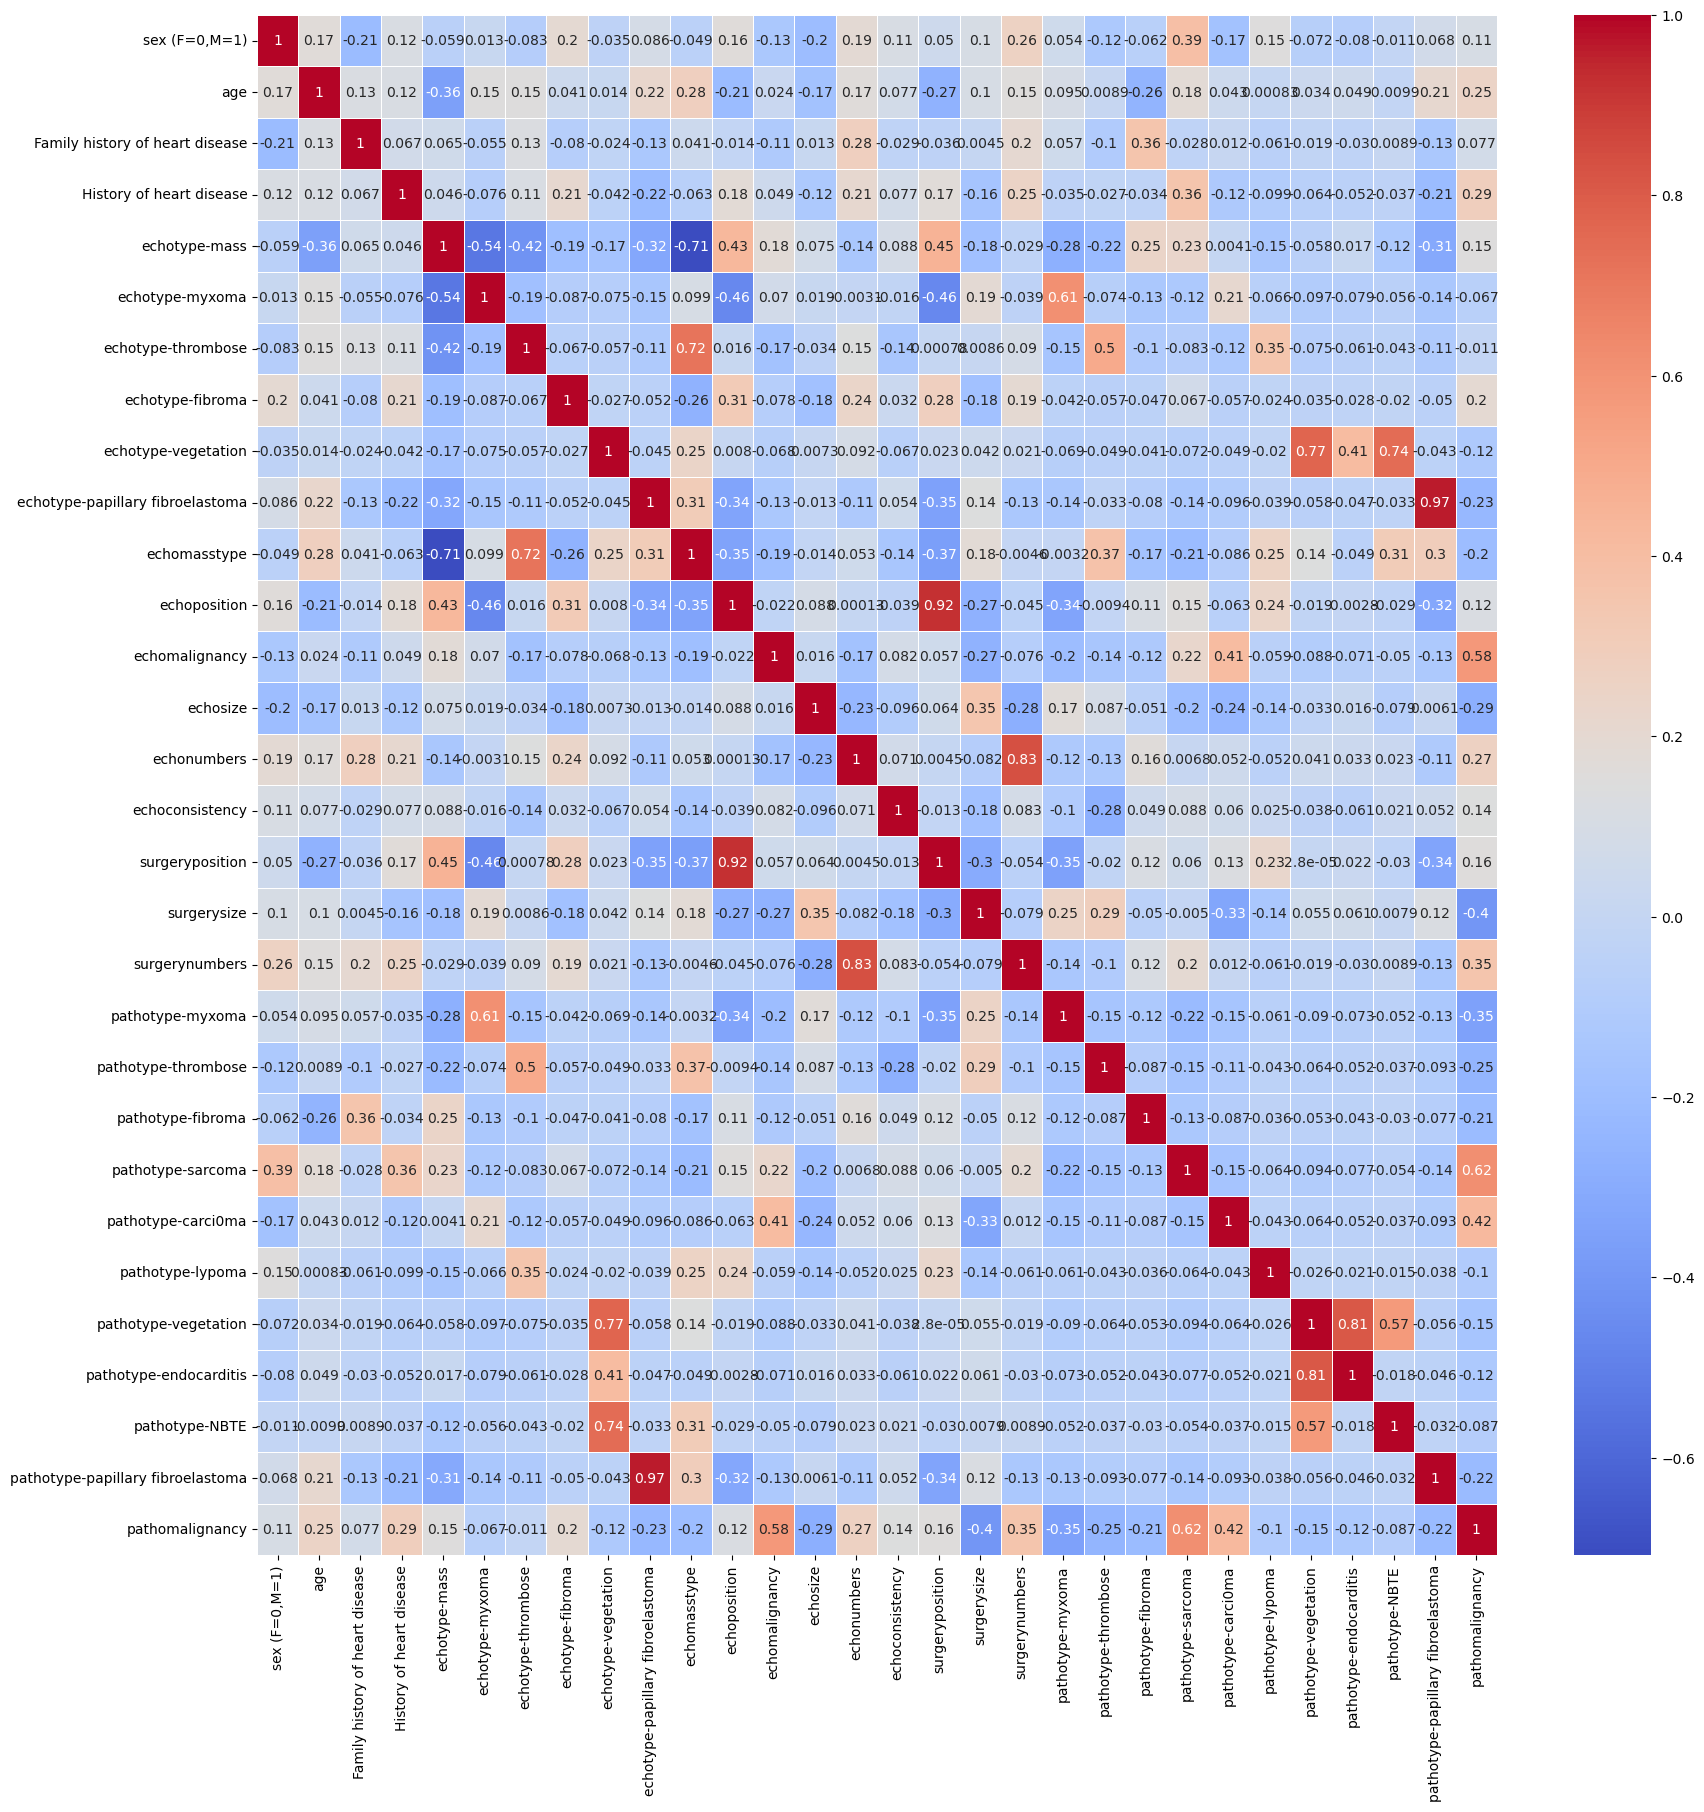

In [29]:
print("\nCorrelation Matrix:")
corr_matrix = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

### Visualizing Key Insights

In [30]:
print("\nVisualizing Key Insights:")
# Correlation with the target variable
target = "pathomalignancy"
corr_target = corr_matrix[target].sort_values(ascending=False)
print("Correlation with the target variable:")
print(corr_target)


Visualizing Key Insights:
Correlation with the target variable:
pathomalignancy                      1.000000
pathotype-sarcoma                    0.618089
echomalignancy                       0.576669
pathotype-carci0ma                   0.420257
surgerynumbers                       0.352851
History of heart disease             0.291890
echonumbers                          0.270582
age                                  0.247172
echotype-fibroma                     0.197757
surgeryposition                      0.155154
echotype-mass                        0.151859
echoconsistency                      0.141678
echoposition                         0.123516
sex (F=0,M=1)                        0.105796
Family history of heart disease      0.077256
echotype-thrombose                  -0.010512
echotype-myxoma                     -0.066995
pathotype-NBTE                      -0.086968
pathotype-lypoma                    -0.103164
echotype-vegetation                 -0.117277
pathotype-endoc

### Target class balance
Showing the counts of values in the target class - pathomalignancy

<Axes: xlabel='pathomalignancy'>

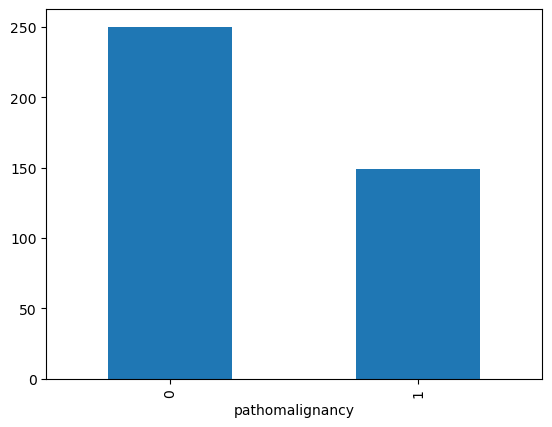

In [31]:
df[target].value_counts()[:20].plot(kind='bar')

The dataset is slightly imbalanced with more number of non-pathomalignancy examples

### Finding features with high correlation with target class

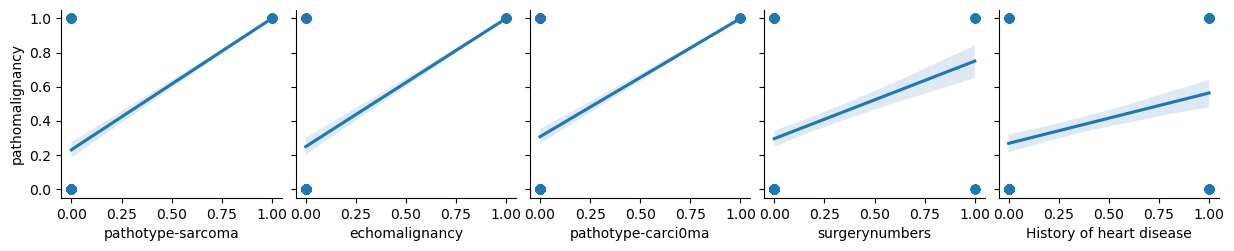

In [32]:
# Top 5 positively correlated features
top_pos_features = corr_target.index[1:6]
sns.pairplot(df, x_vars=top_pos_features, y_vars=target, kind='reg')
plt.show()

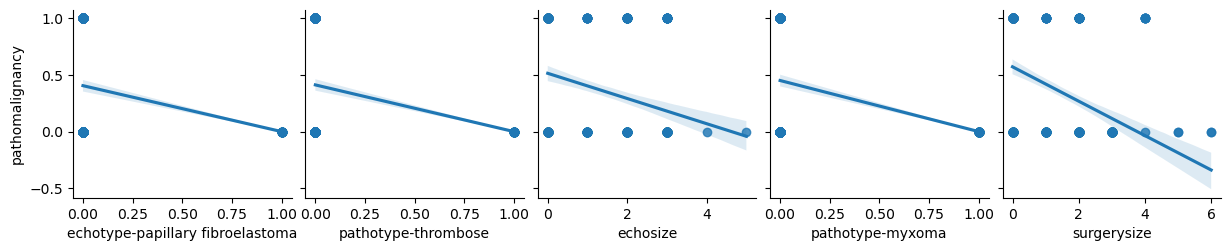

In [33]:
# Top 5 negatively correlated features
top_neg_features = corr_target.index[-5:]
sns.pairplot(df, x_vars=top_neg_features, y_vars=target, kind='reg')
plt.show()

## Machine Learning

### Prepare data
We segregate the features and targets from the data, create train test splits in the ratio 80:20 and then normalize the age values.

In [34]:
# Splitting the dataset into training and testing sets
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing the 'age' column
scaler = StandardScaler()
X_train['age'] = scaler.fit_transform(X_train[['age']])
X_test['age'] = scaler.transform(X_test[['age']])

### Create models

In [35]:
# Dictionary to store the models and their names
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine": SVC(probability=True),
    "Naive Bayes Classifier": GaussianNB(),
    "Random Forest": RandomForestClassifier(n_estimators=500),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Multi layer Perceptron": MLPClassifier(max_iter=1000)
}

# Function to evaluate model performance
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    sensitivity = rec
    
    return acc, prec, rec, specificity, sensitivity, f1

### Train models

In [36]:
# Train and evaluate each model
results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    acc, prec, rec, specificity, sensitivity, f1 = evaluate_model(model, X_test, y_test)
    results[model_name] = {
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "Specificity": specificity,
        "Sensitivity": sensitivity,
        "F1 Score": f1
    }

### Evaluate test data
We compare the results of different models and rank them in ascending order of accuracy

In [37]:
# Display the results
results_df = pd.DataFrame(results).T
results_df_sorted = results_df.sort_values(by="Accuracy", ascending=False)
display(results_df_sorted)

,Accuracy,Precision,Recall,Specificity,Sensitivity,F1 Score
Logistic Regression,0.9875,0.958333,1.000000,0.982456,1.000000,0.978723
Random Forest,0.9875,0.958333,1.000000,0.982456,1.000000,0.978723
Multi layer Perceptron,0.9875,0.958333,1.000000,0.982456,1.000000,0.978723
XGBoost,0.9875,0.958333,1.000000,0.982456,1.000000,0.978723
Support Vector Machine,0.9625,0.916667,0.956522,0.964912,0.956522,0.936170
Naive Bayes Classifier,0.8000,0.589744,1.000000,0.719298,1.000000,0.741935
